In [18]:
import tensorflow as tf
from skimage import transform
from skimage import data
import matplotlib.pyplot as plt
import os
import numpy as np
from skimage.color import rgb2gray
import random

In [19]:
def load_data(data_dir):
    # Get all subdirectories of data_dir. Each represents a label.
    directories = [d for d in os.listdir(data_dir) 
                   if os.path.isdir(os.path.join(data_dir, d))]
    # Loop through the label directories and collect the data in
    # two lists, labels and images.
    labels = []
    images = []
    for d in directories:
        label_dir = os.path.join(data_dir, d)
        file_names = [os.path.join(label_dir, f) 
                      for f in os.listdir(label_dir) 
                      if f.endswith(".ppm")]
        for f in file_names:
            images.append(data.imread(f))
            labels.append(int(d))
    return images, labels

ROOT_PATH = "/home/rishab/Downloads/"
train_data_dir = os.path.join(ROOT_PATH, "TrafficSigns/Training")
test_data_dir = os.path.join(ROOT_PATH, "TrafficSigns/Testing")

images, labels = load_data(train_data_dir)


In [20]:
images_array = np.array(images)
labels_array = np.array(labels)

# Print the `images` dimensions
print(images_array.ndim)

# Print the number of `images`'s elements
print(images_array.size)

# Print the first instance of `images`
images_array[0]

# Print the `labels` dimensions
print(labels_array.ndim)

# Print the number of `labels`'s elements
print(labels_array.size)

# Count the number of labels
print(len(set(labels_array)))

1
4575
1
4575
62


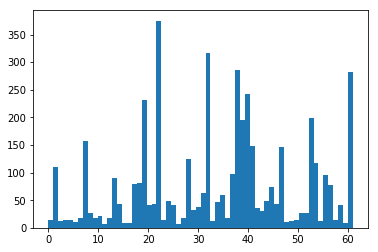

In [21]:
# Import the `pyplot` module
import matplotlib.pyplot as plt 

# Make a histogram with 62 bins of the `labels` data
plt.hist(labels, 62)

# Show the plot
plt.show()


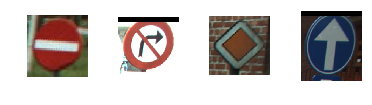

In [22]:
# Import the `pyplot` module of `matplotlib`
import matplotlib.pyplot as plt

# Determine the (random) indexes of the images that you want to see 
traffic_signs = [300, 2250, 3650, 4000]

# Fill out the subplots with the random images that you defined 
for i in range(len(traffic_signs)):
    plt.subplot(1, 4, i+1)
    plt.axis('off')
    plt.imshow(images[traffic_signs[i]])
    plt.subplots_adjust(wspace=0.5)

plt.show()

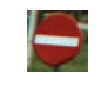

shape: (53, 52, 3), min: 3, max: 244


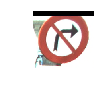

shape: (143, 153, 3), min: 0, max: 255


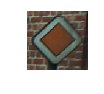

shape: (97, 100, 3), min: 10, max: 181


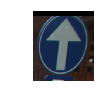

shape: (190, 165, 3), min: 0, max: 200


In [23]:
# Import `matplotlib`
import matplotlib.pyplot as plt

# Determine the (random) indexes of the images
traffic_signs = [300, 2250, 3650, 4000]

# Fill out the subplots with the random images and add shape, min and max values
for i in range(len(traffic_signs)):
    plt.subplot(1, 4, i+1)
    plt.axis('off')
    plt.imshow(images[traffic_signs[i]])
    plt.subplots_adjust(wspace=0.5)
    plt.show()
    print("shape: {0}, min: {1}, max: {2}".format(images[traffic_signs[i]].shape, 
                                                  images[traffic_signs[i]].min(), 
                                                  images[traffic_signs[i]].max()))

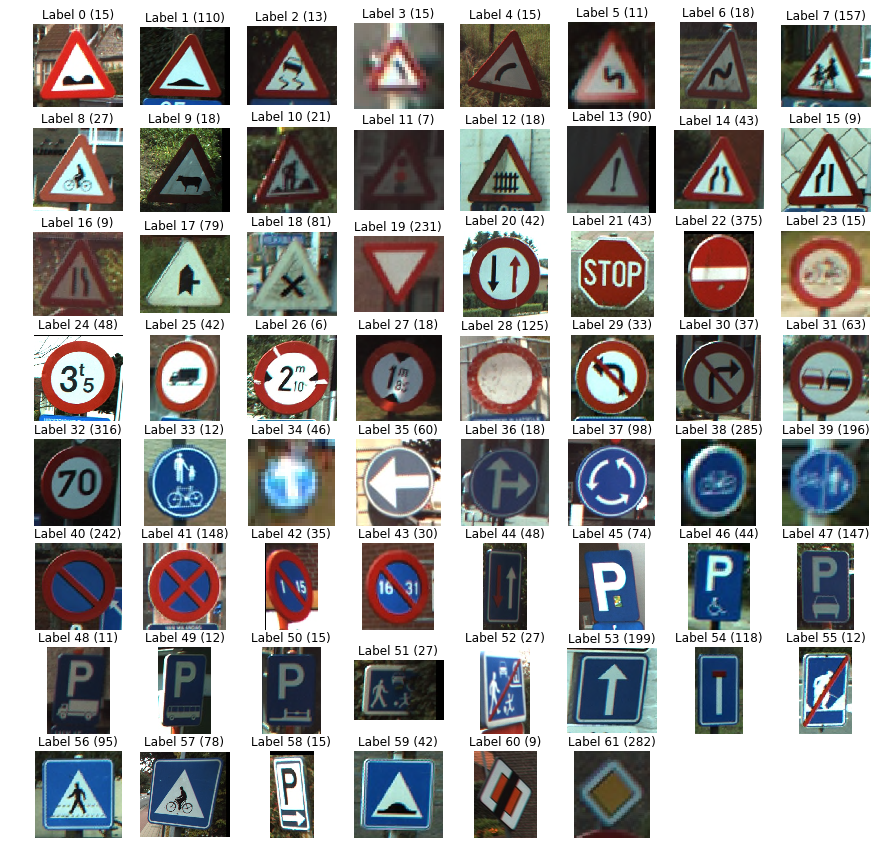

In [24]:
# Import the `pyplot` module as `plt`
import matplotlib.pyplot as plt 

# Get the unique labels 
unique_labels = set(labels)

# Initialize the figure
plt.figure(figsize=(15, 15))

# Set a counter
i = 1

# For each unique label,
for label in unique_labels:
    # You pick the first image for each label
    image = images[labels.index(label)]
    # Define 64 subplots 
    plt.subplot(8, 8, i)
    # Don't include axes
    plt.axis('off')
    # Add a title to each subplot 
    plt.title("Label {0} ({1})".format(label, labels.count(label)))
    # Add 1 to the counter
    i += 1
    # And you plot this first image 
    plt.imshow(image)
    
# Show the plot
plt.show()


In [25]:
# Resize images
images32 = [transform.resize(image, (28, 28)) for image in images]
images32 = np.array(images32)

/home/rishab/anaconda3/lib/python3.6/site-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "


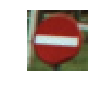

shape: (28, 28, 3), min: 0.0332332933173269, max: 0.9312324929971991


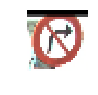

shape: (28, 28, 3), min: 0.0, max: 1.0


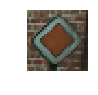

shape: (28, 28, 3), min: 0.07263905562224868, max: 0.6355042016806722


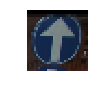

shape: (28, 28, 3), min: 0.0, max: 0.7548344337735069


In [26]:
# Import `matplotlib`
import matplotlib.pyplot as plt

# Determine the (random) indexes of the images
traffic_signs = [300, 2250, 3650, 4000]

# Fill out the subplots with the random images and add shape, min and max values
for i in range(len(traffic_signs)):
    plt.subplot(1, 4, i+1)
    plt.axis('off')
    plt.imshow(images32[traffic_signs[i]])
    plt.subplots_adjust(wspace=0.5)
    plt.show()
    print("shape: {0}, min: {1}, max: {2}".format(images32[traffic_signs[i]].shape, 
                                                  images32[traffic_signs[i]].min(), 
                                                  images32[traffic_signs[i]].max()))

In [27]:
images32 = rgb2gray(np.array(images32))

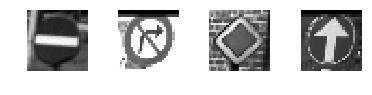

(4575, 28, 28)


In [28]:
for i in range(len(traffic_signs)):
    plt.subplot(1, 4, i+1)
    plt.axis('off')
    plt.imshow(images32[traffic_signs[i]], cmap="gray")
    plt.subplots_adjust(wspace=0.5)
    
plt.show()

print(images32.shape)

In [31]:
#modeling the NN
x = tf.placeholder(dtype = tf.float32, shape = [None, 28, 28])
y = tf.placeholder(dtype = tf.int32, shape = [None])
images_flat = tf.contrib.layers.flatten(x)
logits = tf.contrib.layers.fully_connected(images_flat, 62, tf.nn.relu)
loss = tf.reduce_mean(tf.nn.sparse_softmax_cross_entropy_with_logits(labels = y, logits = logits))
train_op = tf.train.AdamOptimizer(learning_rate=0.001).minimize(loss)
correct_pred = tf.argmax(logits, 1)
accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32))

print("images_flat: ", images_flat)
print("logits: ", logits)
print("loss: ", loss)
print("predicted_labels: ", correct_pred)

images_flat:  Tensor("Flatten_2/flatten/Reshape:0", shape=(?, 784), dtype=float32)
logits:  Tensor("fully_connected_2/Relu:0", shape=(?, 62), dtype=float32)
loss:  Tensor("Mean_2:0", shape=(), dtype=float32)
predicted_labels:  Tensor("ArgMax_1:0", shape=(?,), dtype=int64)


In [33]:
#running the NN

sess = tf.Session()

sess.run(tf.global_variables_initializer())

for i in range(201):
        print('EPOCH', i)
        _, accuracy_val = sess.run([train_op, accuracy], feed_dict={x: images32, y: labels})
        if i % 10 == 0:
            print("Loss: ", loss)
        print('DONE WITH EPOCH')

EPOCH 0
Loss:  Tensor("Mean_2:0", shape=(), dtype=float32)
DONE WITH EPOCH
EPOCH 1
DONE WITH EPOCH
EPOCH 2
DONE WITH EPOCH
EPOCH 3
DONE WITH EPOCH
EPOCH 4
DONE WITH EPOCH
EPOCH 5
DONE WITH EPOCH
EPOCH 6
DONE WITH EPOCH
EPOCH 7
DONE WITH EPOCH
EPOCH 8
DONE WITH EPOCH
EPOCH 9
DONE WITH EPOCH
EPOCH 10
Loss:  Tensor("Mean_2:0", shape=(), dtype=float32)
DONE WITH EPOCH
EPOCH 11
DONE WITH EPOCH
EPOCH 12
DONE WITH EPOCH
EPOCH 13
DONE WITH EPOCH
EPOCH 14
DONE WITH EPOCH
EPOCH 15
DONE WITH EPOCH
EPOCH 16
DONE WITH EPOCH
EPOCH 17
DONE WITH EPOCH
EPOCH 18
DONE WITH EPOCH
EPOCH 19
DONE WITH EPOCH
EPOCH 20
Loss:  Tensor("Mean_2:0", shape=(), dtype=float32)
DONE WITH EPOCH
EPOCH 21
DONE WITH EPOCH
EPOCH 22
DONE WITH EPOCH
EPOCH 23
DONE WITH EPOCH
EPOCH 24
DONE WITH EPOCH
EPOCH 25
DONE WITH EPOCH
EPOCH 26
DONE WITH EPOCH
EPOCH 27
DONE WITH EPOCH
EPOCH 28
DONE WITH EPOCH
EPOCH 29
DONE WITH EPOCH
EPOCH 30
Loss:  Tensor("Mean_2:0", shape=(), dtype=float32)
DONE WITH EPOCH
EPOCH 31
DONE WITH EPOCH
EPOCH 

In [34]:
# Evaluating the NN
# Pick 10 random images

sample_indexes = random.sample(range(len(images32)), 10)
sample_images = [images32[i] for i in sample_indexes]
sample_labels = [labels[i] for i in sample_indexes]

# Run the "predicted_labels" op.
predicted = sess.run([correct_pred], feed_dict={x: sample_images})[0]
                        
# Print the real and predicted labels
print(sample_labels)
print(predicted)

[8, 44, 47, 61, 18, 13, 41, 17, 19, 15]
[13 44 47 61 18 13 40 17 19 17]


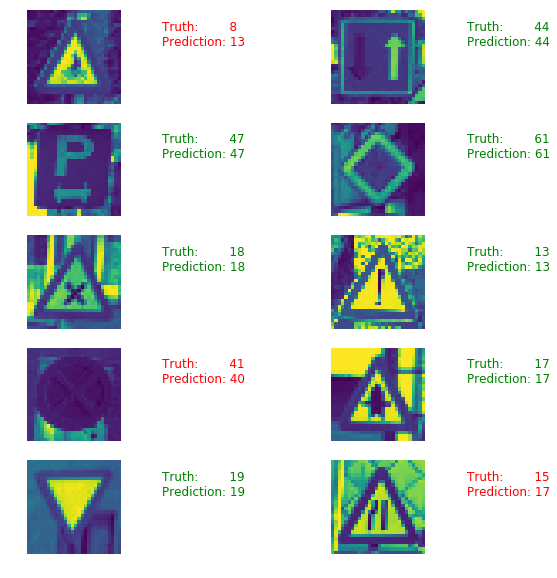

In [35]:
# Display the predictions and the ground truth visually.
fig = plt.figure(figsize=(10, 10))
for i in range(len(sample_images)):
    truth = sample_labels[i]
    prediction = predicted[i]
    plt.subplot(5, 2,1+i)
    plt.axis('off')
    color='green' if truth == prediction else 'red'
    plt.text(40, 10, "Truth:        {0}\nPrediction: {1}".format(truth, prediction), 
             fontsize=12, color=color)
    plt.imshow(sample_images[i])

plt.show()

In [36]:
# Load the test data
test_images, test_labels = load_data(test_data_dir)

# Transform the images to 28 by 28 pixels
test_images28 = [transform.resize(image, (28, 28)) for image in test_images]

# Convert to grayscale
from skimage.color import rgb2gray
test_images28 = rgb2gray(np.array(test_images28))

# Run predictions against the full test set.
predicted = sess.run([correct_pred], feed_dict={x: test_images28})[0]

# Calculate correct matches 
match_count = sum([int(y == y_) for y, y_ in zip(test_labels, predicted)])

# Calculate the accuracy
accuracy = match_count / len(test_labels)

# Print the accuracy
print("Accuracy: {:.3f}".format(accuracy))

/home/rishab/anaconda3/lib/python3.6/site-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "


Accuracy: 0.706
